In [1]:
import json

In [2]:
json.dumps(['foo', {'bar': ('baz', None, 1.0, 2)}])

'["foo", {"bar": ["baz", null, 1.0, 2]}]'

In [3]:
print(json.dumps("\"foo\bar"))

"\"foo\bar"


In [4]:
print(json.dumps('\u1234'))

"\u1234"


In [5]:
print(json.dumps('\\'))

"\\"


In [6]:
print(json.dumps({"c":0, "b":0, "a":0}, sort_keys=True))
print(type(json.dumps({"c":0, "b":0, "a":0}, sort_keys=True)))

{"a": 0, "b": 0, "c": 0}
<class 'str'>


In [7]:
from io import StringIO
io = StringIO()
json.dump(['streaming API'], io)
io.getvalue()

'["streaming API"]'

In [8]:
json.dumps([1,2,3, {'4':5, '6':7}], separators = (',', ':'))

'[1,2,3,{"4":5,"6":7}]'

In [9]:
data = json.dumps({'4':5, '6':7}, sort_keys=True, indent=4)
print(data)
print(type(data))

{
    "4": 5,
    "6": 7
}
<class 'str'>


In [10]:
data = json.loads('["foo", {"bar":["baz", null, 1.0, 2]}]')
print(data)
print(type(data))

['foo', {'bar': ['baz', None, 1.0, 2]}]
<class 'list'>


# Basic Usage

## json.dump
json.**dump** *(obj, fp, *, skipkeys=False, ensure_ascii=True, check_circular=True, allow_nan=True, cls=None, indent=None, separators=None, default=None, sort_keys=False, ***kw)*

Serialize obj as a JSON formatted stream to fp (a .write()-supporting file-like object) using this conversion table.

If skipkeys is true (default: False), then dict keys that are not of a basic type (str, int, float, bool, None) will be skipped instead of raising a TypeError.

The json module always produces str objects, not bytes objects. Therefore, fp.write() must support str input.

If allow_nan is false (default: True), then it will be a ValueError to serialize out of range float values (nan, inf, -inf) in strict compliance of the JSON specification. If allow_nan is true, their JavaScript equivalents (NaN, Infinity, -Infinity) will be used.

If specified, separators should be an (item_separator, key_separator) tuple. The default is (', ', ': ') if indent is None and (',', ': ') otherwise. To get the most compact JSON representation, you should specify (',', ':') to eliminate whitespace.

If specified, default should be a function that gets called for objects that can’t otherwise be serialized. It should return a JSON encodable version of the object or raise a TypeError. If not specified, TypeError is raised.


## json.dumps
json.**dumps** *(obj, *, skipkeys=False, ensure_ascii=True, check_circular=True, allow_nan=True, cls=None, indent=None, separators=None, default=None, sort_keys=False, ***kw)*

Serialize obj to a JSON formatted str using this conversion table. The arguments have the same meaning as in dump().

## json.load
json.**load** *(fp, *, cls=None, object_hook=None, parse_float=None, parse_int=None, parse_constant=None, object_pairs_hook=None, ***kw)*

Deserialize fp (a .read()-supporting text file or binary file containing a JSON document) to a Python object using this conversion table.

Deserialize fp (a .read()-supporting text file or binary file containing a JSON document) to a Python object using this conversion table.

object_hook is an optional function that will be called with the result of any object literal decoded (a dict). The return value of object_hook will be used instead of the dict. This feature can be used to implement custom decoders (e.g. JSON-RPC class hinting).

object_pairs_hook is an optional function that will be called with the result of any object literal decoded with an ordered list of pairs. The return value of object_pairs_hook will be used instead of the dict. This feature can be used to implement custom decoders. If object_hook is also defined, the object_pairs_hook takes priority.

## json.loads
json.**loads** *(s, *, cls=None, object_hook=None, parse_float=None, parse_int=None, parse_constant=None, object_pairs_hook=None, ***kw)*

Deserialize s (a str, bytes or bytearray instance containing a JSON document) to a Python object using this conversion table.

The other arguments have the same meaning as in load().

If the data being deserialized is not a valid JSON document, a JSONDecodeError will be raised.

# Encoders and Decoders

## JSONDecoder

json.**JSONDecoder** **(***, object_hook=None, parse_float=None, parse_int=None, parse_constant=None, strict=True, object_pairs_hook=None)*

Simple JSON decoder

Performs the following translation in decoding by default
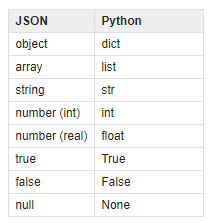

It also understands NaN, Infinity, and -Infinity as their corresponding float values, which is outside the JSON spec.

`object_hook`, if specified, will be called with the result of every JSON object decoded and its return value will be used in place of the given dict. This can be used to provide custom deserializations (e.g. to support JSON-RPC class hinting).

`object_pairs_hook`, if specified will be called with the result of every JSON object decoded with an ordered list of pairs. The return value of object_pairs_hook will be used instead of the dict. This feature can be used to implement custom decoders. If object_hook is also defined, the object_pairs_hook takes priority.

Changed in version 3.1: Added support for object_pairs_hook.

`parse_float`, if specified, will be called with the string of every JSON float to be decoded. By default, this is equivalent to float(num_str). This can be used to use another datatype or parser for JSON floats (e.g. decimal.Decimal).

`parse_int`, if specified, will be called with the string of every JSON int to be decoded. By default, this is equivalent to int(num_str). This can be used to use another datatype or parser for JSON integers (e.g. float).

`parse_constant`, if specified, will be called with one of the following strings: '-Infinity', 'Infinity', 'NaN'. This can be used to raise an exception if invalid JSON numbers are encountered.

If strict is false (True is the default), then control characters will be allowed inside strings. Control characters in this context are those with character codes in the 0–31 range, including '\t' (tab), '\n', '\r' and '\0'.

If the data being deserialized is not a valid JSON document, a JSONDecodeError will be raised.

**decode**(s)
- Return the Python representation of s (a str instance containing a JSON document).
- JSONDecodeError will be raised if the given JSON document is not valid.  

**raw_decode**(s)
- Decode a JSON document from s (a str beginning with a JSON document) and return a 2-tuple of the Python representation and the index in s where the document ended.
- This can be used to decode a JSON document from a string that may have extraneous data at the end.

## JSONEncoder

class json.**JSONEncoder** **(***, skipkeys=False, ensure_ascii=True, check_circular=True, allow_nan=True, sort_keys=False, indent=None, separators=None, default=None)*

Extensible JSON encoder for Python data structures.

Supports the following objects and types by default.
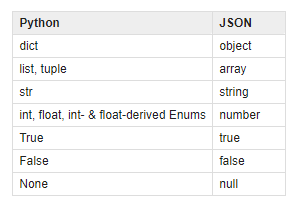

To extend this to recognize other objects, subclass and implement a default() method with another method that returns a serializable object for o if possible, otherwise it should call the superclass implementation (to raise TypeError).

If `skipkeys` is false (the default), then it is a TypeError to attempt encoding of keys that are not str, int, float or None. If skipkeys is true, such items are simply skipped.

If `ensure_ascii` is true (the default), the output is guaranteed to have all incoming non-ASCII characters escaped. If ensure_ascii is false, these characters will be output as-is.

If `check_circular` is true (the default), then lists, dicts, and custom encoded objects will be checked for circular references during encoding to prevent an infinite recursion (which would cause an OverflowError). Otherwise, no such check takes place.

If `allow_nan` is true (the default), then NaN, Infinity, and -Infinity will be encoded as such. This behavior is not JSON specification compliant, but is consistent with most JavaScript based encoders and decoders. Otherwise, it will be a ValueError to encode such floats.

If `sort_keys` is true (default: False), then the output of dictionaries will be sorted by key; this is useful for regression tests to ensure that JSON serializations can be compared on a day-to-day basis.

If `indent` is a non-negative integer or string, then JSON array elements and object members will be pretty-printed with that indent level. An indent level of 0, negative, or "" will only insert newlines. None (the default) selects the most compact representation. Using a positive integer indent indents that many spaces per level. If indent is a string (such as "\t"), that string is used to indent each level.

Changed in version 3.2: Allow strings for indent in addition to integers.

If specified, `separators` should be an (item_separator, key_separator) tuple. The default is (', ', ': ') if indent is None and (',', ': ') otherwise. To get the most compact JSON representation, you should specify (',', ':') to eliminate whitespace.

Changed in version 3.4: Use (',', ': ') as default if indent is not None.

If specified, `default` should be a function that gets called for objects that can’t otherwise be serialized. It should return a JSON encodable version of the object or raise a TypeError. If not specified, TypeError is raised.

**decode**(o)
- Implement this method in a subclass such that it returns a serializable object for o, or calls the base implementation (to raise a TypeError).
```
def default(self, o):
   try:
       iterable = iter(o)
   except TypeError:
       pass
   else:
       return list(iterable)
   # Let the base class default method raise the TypeError
   return json.JSONEncoder.default(self, o)
```

**encode**(o)
- Return a JSON string representation of a Python data structure, o. For example:
```
>>> json.JSONEncoder().encode({"foo": ["bar", "baz"]})
'{"foo": ["bar", "baz"]}'
```

**iterencode**(o)
- Encode the given object, o, and yield each string representation as available. For example:
```
for chunk in json.JSONEncoder().iterencode(bigobject):
    mysocket.write(chunk)
```